In [1]:
import pandas as pd
#Reading the NIFTY50 data and oarsing the dates
df = pd.read_csv("NIFTY 50.csv",
                 parse_dates=['Date'],
                index_col=["Date"]) #parising the date column and making it out index

In [2]:
df.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [3]:
df.tail()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2021-07-01,15755.05,15755.55,15667.05,15680.00,224921644,1.736000e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,15722.20,254808999,1.801540e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,15834.35,207032153,1.497650e+11,28.53,4.27,1.23
2021-07-06,15813.75,15914.20,15801.00,15818.25,391410742,2.445610e+11,28.50,4.26,1.10
2021-07-07,15819.60,15893.55,15779.70,15879.65,329308646,2.226000e+11,28.62,4.28,1.10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5353 entries, 2000-01-03 to 2021-07-07
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5353 non-null   float64
 1   High       5353 non-null   float64
 2   Low        5353 non-null   float64
 3   Close      5353 non-null   float64
 4   Volume     5353 non-null   int64  
 5   Turnover   5353 non-null   float64
 6   P/E        5353 non-null   float64
 7   P/B        5353 non-null   float64
 8   Div Yield  5353 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 418.2 KB


In [5]:
len(df) #check the number of examples

5353

## Creating a univariate time series data

In this we will only take the closing priceof NIFTY for each day as a feature

In [6]:
for col in df.columns:
    print(col)

Open
High
Low
Close
Volume
Turnover
P/E
P/B
Div Yield


In [7]:
nifty_prices = pd.DataFrame(df["Close"]).rename(columns={"Close":"Price"})
nifty_prices.head()

,Price
Date,
2000-01-03,1592.2
2000-01-04,1638.7
2000-01-05,1595.8
2000-01-06,1617.6
2000-01-07,1613.3


## Visualizing our data

### Line Plot

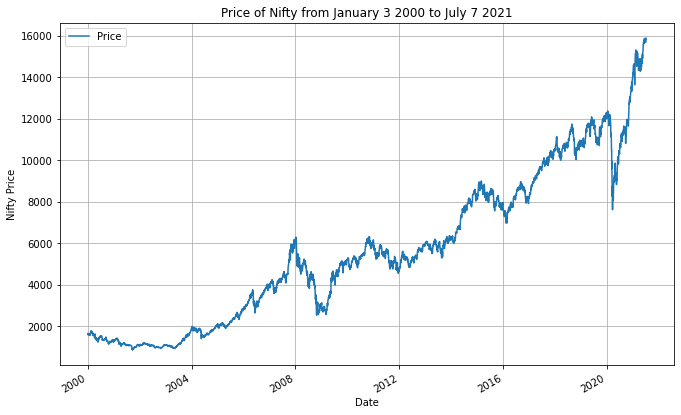

In [8]:
import matplotlib.pyplot as plt
nifty_prices.plot(figsize=(11,7))
plt.ylabel("Nifty Price")
plt.xlabel("Date")
plt.title("Price of Nifty from January 3 2000 to July 7 2021")
plt.legend()
plt.grid(True)
plt.show()

### Box Plot

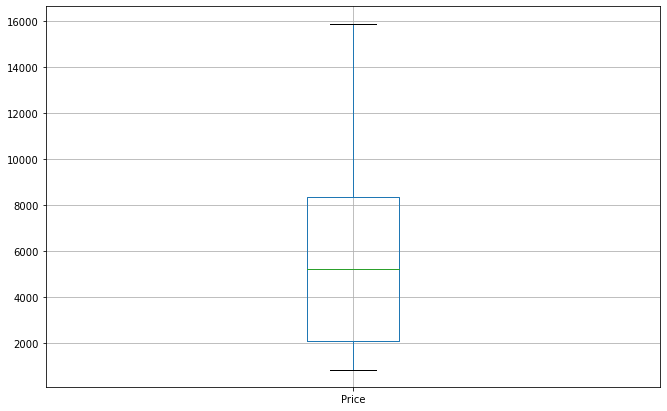

In [9]:
nifty_prices.plot(kind="box",figsize=(11,7))
plt.grid(True)

## Creating test and train datasets

In [10]:
time_interval = nifty_prices.index.to_numpy()
prices = nifty_prices["Price"].to_numpy()
time_interval[:5],prices[:5]

(array(['2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
        '2000-01-05T00:00:00.000000000', '2000-01-06T00:00:00.000000000',
        '2000-01-07T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([1592.2, 1638.7, 1595.8, 1617.6, 1613.3]))

In [11]:
# Since we are dealing with time series data we want to avaoid randomizing our data
# while making testing and training dataset

# Defining our split size
split_size = int(0.8*len(nifty_prices)) 
#Creating Training dataset
X_train,y_train = time_interval[:split_size],prices[:split_size]
#Creating training dataset
X_test,y_test = time_interval[split_size:],prices[split_size:]
#Print len of each variable
len(X_train),len(y_train),len(X_test),len(y_test)

(4282, 4282, 1071, 1071)

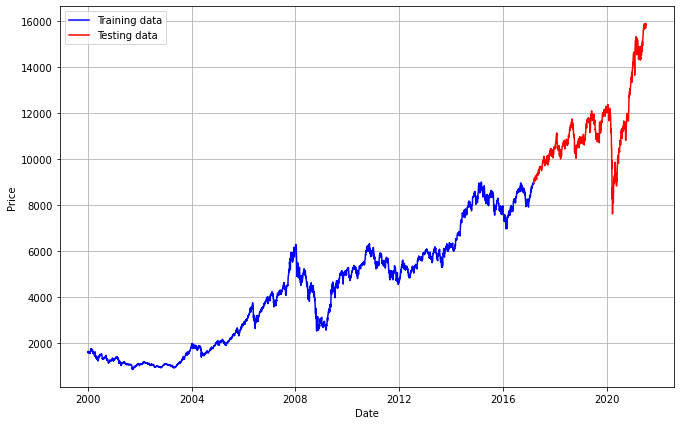

In [12]:
#plotting test and train sets
plt.figure(figsize=(11,7))
plt.plot(X_train,y_train,color='b',label="Training data")
plt.plot(X_test,y_test,color='r',label="Testing data")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

## Creating windowed dataset

We window our dataset in order to convert our problem to a supervised learning problem

Horizon = Number of values to be predicted
Window = Number of values from past use to predict the future values\

For our problem we will use Window = 7 and Horizon = 1

In [13]:
WINDOW_SIZE = 7
HORIZON = 1

In [14]:
# Create a function to label windowed data
def get_labeled_window(x,horizon=HORIZON,get_labels=True):
    """
    Creates labels for windowed dataset
    e.g. if horizon=1
    Input:[0,1,2,3,4,5,6,7] -> Output:([1,2,3,4,5,6],[7])
    """
    if(get_labels):
        return x[:,:-horizon],x[:,-horizon:]
    return x[:,:-horizon]
# Create function to view Numpy arrays as windows
import numpy as np
def make_windows(x,window_size=WINDOW_SIZE,horizon=HORIZON,get_labels=True):
    """
    Turns a 1D array into 2D array of sequential labelled windows of window_size with horizon size labels
    Parameters
    ----------
    x           : input data
    window size : integer
                  No of previous data points we want to use to forecast values
    horizon     : integer
                  Number of future datapoints we want to predict
    get_labels  : Bool
                  Pass True if you want to get labels otherwise pass False
                  Default = True
    """
    # 1.Create a window of specific window_size(Add the horizon on the end for labelling later)
    window_step = np.expand_dims(np.arange(window_size+horizon),axis=0)
    print(window_step,window_step.shape)
    # 2.Create a 2D array of multiple window steps(minus 1 to account for 0 indexing)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)),axis=0).T #Create 2D array of windows of WINDOW_SIZE
    #print(f"Windows Indexes:\n {window_indexes,window_indexes.shape}")
    
    # 3.Index on the target array(a time series)with 2D array of multiple window steps
    windowed_array = x[window_indexes]
    #print(windowed_array,windowed_array.shape)
    
    # 4.Get the labelled windows
    windows,labels = get_labeled_window(windowed_array,horizon=horizon)
    if(get_labels==True):
        return windows,labels   
    return windows
# Make train and test splits
def make_train_test_splits(windows,labels,test_size=0.2):
    """
    Splits matching pairs of windows and labels into train and test set
    
    Parameters
    ----------
    windows : 
                the window array of the time series data
    labels : 
                the horizon array of the time series data
    test_size :
                the ratio in which we want to split the data.Default=0.2
    """
    split_size = int((len(windows))*(1-test_size))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    return train_windows,test_windows,train_labels,test_labels

In [15]:
full_windows,full_labels = make_windows(prices)
len(full_windows),len(full_labels)

[[0 1 2 3 4 5 6 7]] (1, 8)


(5346, 5346)

In [16]:
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,
                                                                            full_labels,
                                                                            test_size=0.2)
len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(4276, 1070, 4276, 1070)

## Creating Model Checkpoints

In [17]:
import os
# Create a function to implement ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name,save_path="model_experiments"):
    """
    Creates a directory to save modelcheckpoint
    Parameters
    ----------
    model_name:
                type = str
                The name of the experiment we are running
    save_path :
                type = str
                The name of the folder in whcih we want to save all our modelcheckpoints
                Default:"model_experiments"
    monitor : 
                default="val_loss"
                Automatically dave the results at the epoch where the validation loss 
                is minimun
    """
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path,
                                                                    model_name),
                                              monitor="val_loss",
                                             verbose=0, #only output a limited amount of text
                                             save_best_only=True)

# Create tensorboard callbacks

In [18]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
    """
    Creates a TensorBoard callback instand to store log files.

    Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"

    Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
    """
    log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
    )
    print(f"Saving TensorBoard log files to: {log_dir}")
    return tensorboard_callback

# Creating the model - RNN coupled with LSTM

In [19]:
import tensorflow as tf
from tensorflow.keras import layers

In [20]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128, activation="relu")(x) 
output = layers.Dense(HORIZON)(x)
model = tf.keras.Model(inputs=inputs, outputs=output, name="model_lstm")

# Compile model
model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
history_1 = model.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model.name),
                      create_tensorboard_callback(dir_name="models",
                                                 experiment_name=model.name)])

Saving TensorBoard log files to: models/model_lstm/20210820-204039
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_lstm\assets
INFO:tenso

In [21]:
# plot the validation andtraining curves seperately
def plot_loss_curves(history,x=5,y=6):
    """
    Returns loss curves for training and validation metrics
    
    Parameters
    ----------
    history : the value returned by model.fit
    x : length of size of graph 
    y : width of size of graph
    """
    loss = history.history['loss']
    val_loss = history.history["val_loss"]
    
    epochs = range(len(history.history["loss"])) #for how many epochs did our model fir for
    
    #Plot loss
    plt.figure(figsize=(x,y))
    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="validation_loss")
    plt.title("Loss")
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.legend()
   


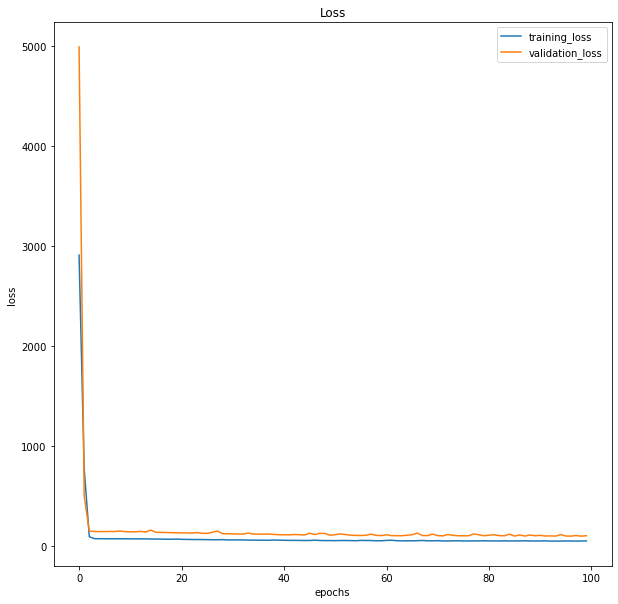

In [22]:
#plotting loss curves of model_1
plot_loss_curves(history_1,10,10)

In [23]:
# Loading the best version of our model
model = tf.keras.models.load_model("model_experiments/model_lstm")
model.evaluate(test_windows,test_labels)

34/34 [==============================] - 0s 2ms/step - loss: 96.5976


96.59762573242188

In [24]:
def make_preds(model,input_data):
    """
    Uses model to make prediction on input_data
    Parameters
    ----------
    model : type = tensorflow.python.keras.engine.sequential.Sequential
            The model that we want to use to make our predictions
    input_data : type = [array]
                 The data for which want to predict the outcomes   
    """
    predictions = model.predict(input_data)
    return tf.squeeze(predictions)

In [25]:
model_preds = make_preds(model,test_windows)
len(model_preds),model_preds[:10]

(1070,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8944.351 , 9022.98  , 9077.92  , 9140.039 , 9168.289 , 9169.194 ,
        9142.355 , 9087.9795, 9078.646 , 9093.65  ], dtype=float32)>)

In [26]:
# MASE implementation
def mean_absolute_scaled_error(y_true,y_pred):
    """
    Implement MASE(assuming no seasonality of data)
    """
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    
    # Find MAE of naive forecast(no seasonality)
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1])) #our seasonality is one day, hence a shift of one
    return mae/mae_naive_no_season

def evaluate_preds(y_true,y_pred):
    """
    Returns different evaluation metric results
    Parameters
    ----------
    y_true :type - [array] 
            the true values of the data 
    y_pred :type - [array]
            the predicted values of the data
    """
    # Make sure float32 datatype(for metric calculations)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    #Calculate various evaluation metrics
    mae = tf.keras.metrics.mean_absolute_error(y_true,y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true,y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true,y_pred)
    
    return{"mae":mae.numpy(),
           "mse":mse.numpy(),
           "rmse":rmse.numpy(),
           "mape":mape.numpy(),
           "mase":mase.numpy(),
          }

In [27]:
model_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_preds)
model_results

{'mae': 96.59763,
 'mse': 19681.373,
 'rmse': 140.29031,
 'mape': 0.8686534,
 'mase': 1.1389375}

In [28]:
type(model_preds.numpy())

numpy.ndarray

In [29]:
type(model_preds)

tensorflow.python.framework.ops.EagerTensor

# Function to Plot Predictions

In [30]:
#plotting the predictions
def convert_tensor_to_numpy(preds):
    return preds.numpy()

def plot_predictions(preds):
    plt.figure(figsize=(11,7))
    plt.plot(X_train,y_train,color='b',label="Training data")
    plt.plot(X_test,y_test,color='r',label="Testing data")
    plt.plot(X_test[:-1],convert_tensor_to_numpy(preds),color='g',label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(11,7))
    plt.plot(X_test,y_test,color='r',label="Testing data")
    plt.plot(X_test[:-1],convert_tensor_to_numpy(preds),color='g',label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

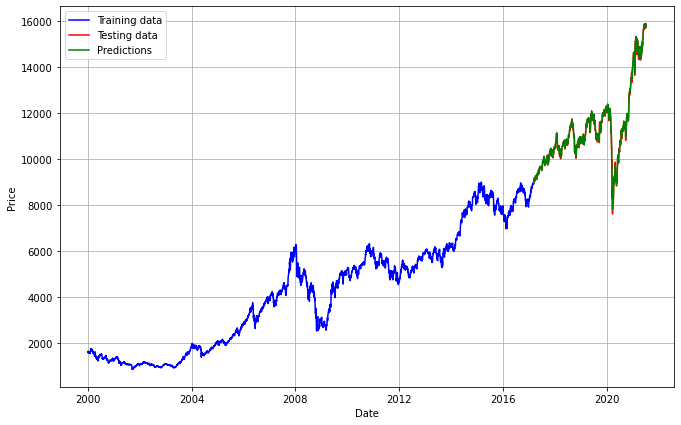

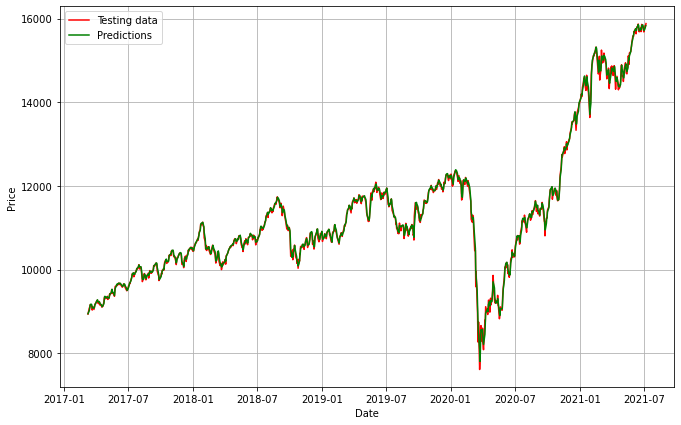

In [31]:
plot_predictions(model_preds)

## Model 2

In [32]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128,activation="relu")(x)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
x = layers.LSTM(128, activation="relu")(x) 
x = layers.Dense(64,activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_2 = tf.keras.Model(inputs=inputs, outputs=output, name="model_2_lstm")

# Compile model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
hsitory_2 = model_2.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name),
                      create_tensorboard_callback(dir_name="models",
                                                 experiment_name=model_2.name)])

Saving TensorBoard log files to: models/model_2_lstm/20210820-204150
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_2_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\mo

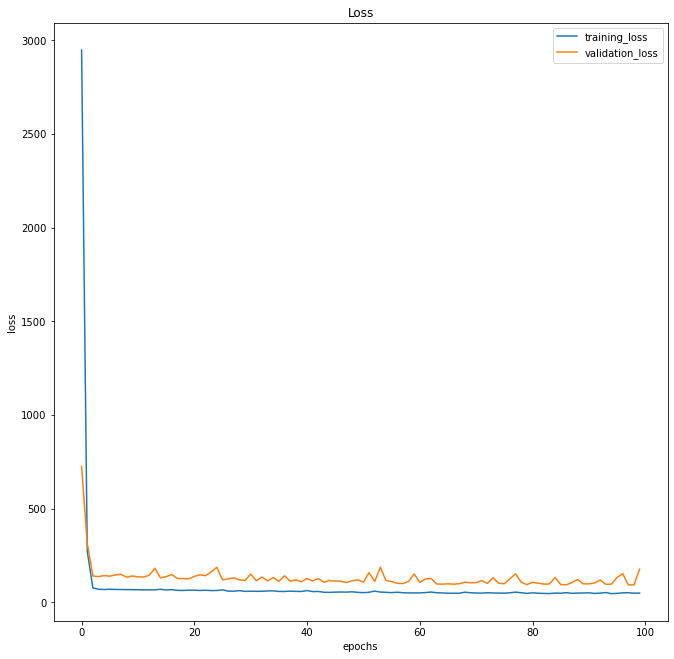

In [33]:
#plot loss curves
plot_loss_curves(hsitory_2,11,11)

In [34]:
# Loading the best version of our model
model_2 = tf.keras.models.load_model("model_experiments/model_2_lstm")
model_2.evaluate(test_windows,test_labels)

34/34 [==============================] - 0s 2ms/step - loss: 93.0735


93.073486328125

In [35]:
model_2_preds = make_preds(model_2,test_windows)
len(model_2_preds),model_2_preds[:10]

(1070,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8937.721, 9028.175, 9082.983, 9144.864, 9174.22 , 9157.653,
        9127.739, 9071.946, 9067.338, 9092.802], dtype=float32)>)

In [36]:
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_2_preds)
model_2_results

{'mae': 93.073494,
 'mse': 18424.223,
 'rmse': 135.73586,
 'mape': 0.83619785,
 'mase': 1.097386}

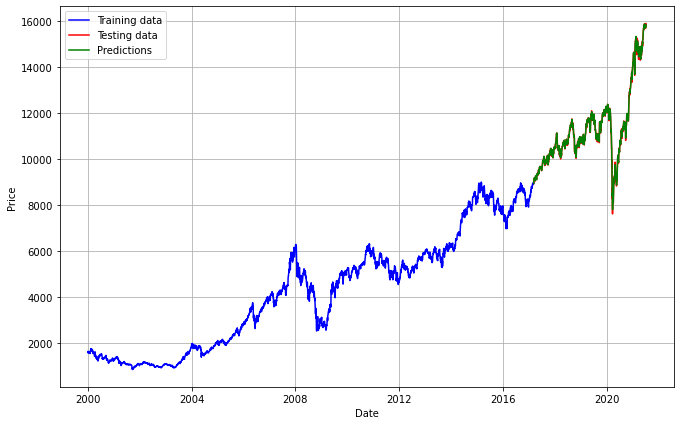

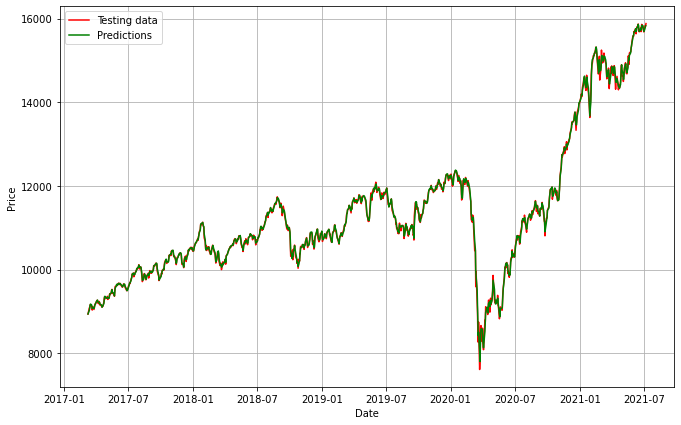

In [37]:
#plotting predcitions
plot_predictions(model_2_preds)

In [38]:
import pandas as pd
df = pd.read_csv("NIFTY 50.csv",
                parse_dates=['Date'],
                index_col=['Date'])

In [39]:
df.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


## Create dataset for model_3

In [40]:
nifty_prices = pd.DataFrame(df["Close"]).rename(columns={"Close":"Price"})
nifty_prices.head()

,Price
Date,
2000-01-03,1592.2
2000-01-04,1638.7
2000-01-05,1595.8
2000-01-06,1617.6
2000-01-07,1613.3


### Creating testing and training datasets

In [41]:
time_interval = nifty_prices.index.to_numpy()
prices = nifty_prices["Price"].to_numpy()
time_interval[:5],prices[:5]

(array(['2000-01-03T00:00:00.000000000', '2000-01-04T00:00:00.000000000',
        '2000-01-05T00:00:00.000000000', '2000-01-06T00:00:00.000000000',
        '2000-01-07T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([1592.2, 1638.7, 1595.8, 1617.6, 1613.3]))

In [42]:
full_windows,full_labels = make_windows(prices)
len(full_windows),len(full_labels)
train_windows,test_windows,train_labels,test_labels = make_train_test_splits(full_windows,
                                                                            full_labels,
                                                                            test_size=0.2)

[[0 1 2 3 4 5 6 7]] (1, 8)


### MinMax Scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_windows = sc.fit_transform(train_windows)
test_windows = sc.transform(test_windows)

In [44]:
train_windows

array([[-1.07006729, -1.05142225, -1.06934838, ..., -1.06294265,
        -1.05529091, -1.08036475],
       [-1.05103532, -1.06897555, -1.0604312 , ..., -1.05490986,
        -1.07999504, -1.05899776],
       [-1.06859385, -1.06005569, -1.06219009, ..., -1.07962143,
        -1.05862158, -1.06038682],
       ...,
       [ 1.91958847,  1.91132201,  1.93713144, ...,  1.91481213,
         1.94046814,  1.9324219 ],
       [ 1.91258962,  1.93840893,  1.91829492, ...,  1.94175163,
         1.93370465,  1.92318875],
       [ 1.93968459,  1.91956674,  1.91739502, ...,  1.9349861 ,
         1.92446869,  1.92429183]])

## Model 3

In [45]:
tf.random.set_seed(42)
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128,activation="relu")(x)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
x = layers.LSTM(128, activation="relu")(x) 
x = layers.Dense(64,activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_3 = tf.keras.Model(inputs=inputs, outputs=output, name="model_3_lstm")

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
history_3 = model_3.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name),
                      create_tensorboard_callback(dir_name="models",
                                                 experiment_name=model_3.name)])

Saving TensorBoard log files to: models/model_3_lstm/20210820-204327
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_3_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\mo

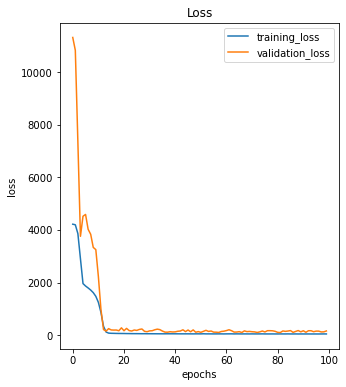

In [46]:
#plotting loss curves
plot_loss_curves(history_3)

In [47]:
# Loading the best version of our model
model_3 = tf.keras.models.load_model("model_experiments/model_3_lstm")
model_3.evaluate(test_windows,test_labels)

34/34 [==============================] - 0s 2ms/step - loss: 98.8845


98.88447570800781

In [48]:
model_3_preds = make_preds(model_3,test_windows)
len(model_3_preds),model_3_preds[:10]

(1070,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8997.342, 9092.349, 9132.772, 9180.538, 9206.242, 9188.094,
        9180.049, 9123.775, 9133.045, 9158.395], dtype=float32)>)

In [49]:
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                              y_pred=model_3_preds)
model_3_results

{'mae': 98.88449,
 'mse': 21246.0,
 'rmse': 145.76007,
 'mape': 0.89008576,
 'mase': 1.1659008}

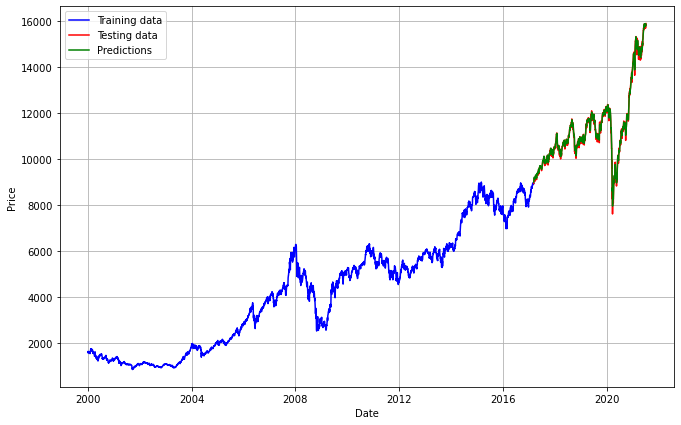

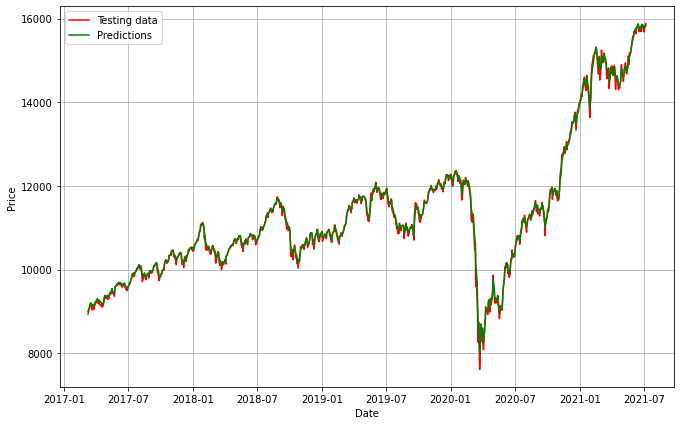

In [50]:
plot_predictions(model_3_preds)

# Creating Multivariate Dataset

In [51]:
df = pd.read_csv("NIFTY 50.csv",
                parse_dates=['Date'],
                index_col=['Date'])
df.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [52]:
close = df["Close"]
close

Date
2000-01-03     1592.20
2000-01-04     1638.70
2000-01-05     1595.80
2000-01-06     1617.60
2000-01-07     1613.30
                ...   
2021-07-01    15680.00
2021-07-02    15722.20
2021-07-05    15834.35
2021-07-06    15818.25
2021-07-07    15879.65
Name: Close, Length: 5353, dtype: float64

In [53]:
df.drop(['Close'],axis=1,inplace=True)

In [54]:
df

,Open,High,Low,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,54315945,1.914630e+10,26.25,4.69,0.94
...,...,...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,224921644,1.736000e+11,28.26,4.23,1.27
2021-07-02,15705.85,15738.35,15635.95,254808999,1.801540e+11,28.33,4.24,1.23
2021-07-05,15793.40,15845.95,15762.05,207032153,1.497650e+11,28.53,4.27,1.23


In [55]:
df['Close'] = close

In [56]:
df

,Open,High,Low,Volume,Turnover,P/E,P/B,Div Yield,Close
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,25358322,8.841500e+09,25.91,4.63,0.95,1592.20
2000-01-04,1594.40,1641.95,1594.40,38787872,1.973690e+10,26.67,4.76,0.92,1638.70
2000-01-05,1634.55,1635.50,1555.05,62153431,3.084790e+10,25.97,4.64,0.95,1595.80
2000-01-06,1595.80,1639.00,1595.80,51272875,2.531180e+10,26.32,4.70,0.94,1617.60
2000-01-07,1616.60,1628.25,1597.20,54315945,1.914630e+10,26.25,4.69,0.94,1613.30
...,...,...,...,...,...,...,...,...,...
2021-07-01,15755.05,15755.55,15667.05,224921644,1.736000e+11,28.26,4.23,1.27,15680.00
2021-07-02,15705.85,15738.35,15635.95,254808999,1.801540e+11,28.33,4.24,1.23,15722.20
2021-07-05,15793.40,15845.95,15762.05,207032153,1.497650e+11,28.53,4.27,1.23,15834.35


In [57]:
# Making X and y values
X = df.iloc[:,:4].values
y = df.iloc[:,-1].values
print(X.shape,y.shape)

(5353, 4) (5353,)


In [58]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(4282, 4) (1071, 4) (4282,) (1071,)


## Model 4

In [59]:
tf.random.set_seed(42)
inputs = layers.Input(shape=4)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
x = layers.LSTM(128,activation="relu")(x)
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(x)
x = layers.LSTM(128, activation="relu")(x) 
x = layers.Dense(64,activation="relu")(x)
output = layers.Dense(1)(x)
model_4 = tf.keras.Model(inputs=inputs, outputs=output, name="model_4_lstm")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
history_4 = model_4.fit(X_train,
            y_train,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(X_test,y_test),
            callbacks=[create_model_checkpoint(model_name=model_4.name),
                      create_tensorboard_callback(dir_name="models",
                                                 experiment_name=model_4.name)])

Saving TensorBoard log files to: models/model_4_lstm/20210820-204449
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets
INFO:tensorflow:Assets written to: model_experiments\model_4_lstm\assets


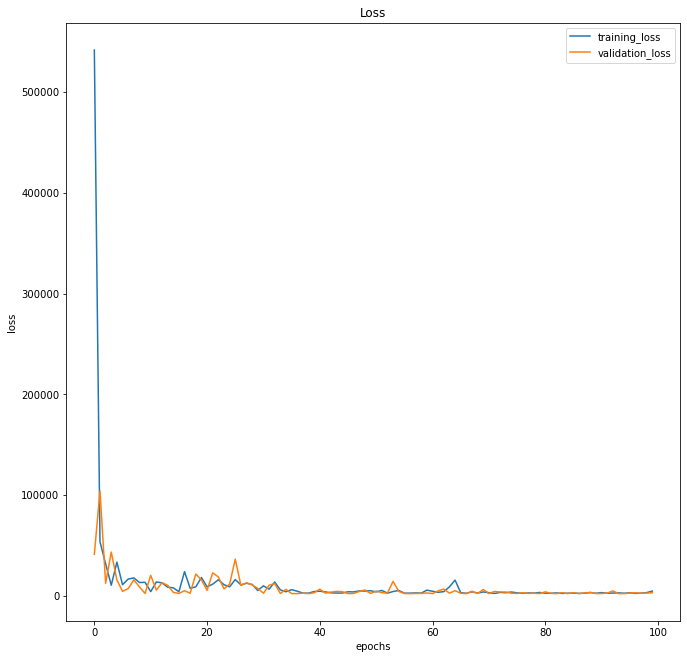

In [60]:
#plotting loss curves
plot_loss_curves(history_4,11,11)

In [61]:
# Loading the best version of our model
model_4 = tf.keras.models.load_model("model_experiments/model_4_lstm")
model_4.evaluate(X_test,y_test)

34/34 [==============================] - 0s 2ms/step - loss: 2276.8728


2276.872802734375

In [62]:
model_4_preds = make_preds(model_4,X_test)
len(model_4_preds),model_4_preds[:10]

(1071,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([4215.7886, 1975.3826, 5025.7886, 1295.7048, 2258.3162, 4038.656 ,
        4892.32  , 1179.031 , 4471.734 , 8888.18  ], dtype=float32)>)

In [63]:
model_4_results = evaluate_preds(y_true=y_test,
                              y_pred=model_4_preds)
model_4_results

{'mae': 2276.8726,
 'mse': 10677919.0,
 'rmse': 3267.7085,
 'mape': 44.240833,
 'mase': 0.5544489}

In [64]:
#plotting_model_4_preds
split_size = int(0.8*len(nifty_prices)) 
#Creating Training dataset
X_train,y_train = time_interval[:split_size],prices[:split_size]
#Creating training dataset
X_test,y_test = time_interval[split_size:],prices[split_size:]
#Print len of each variable
len(X_train),len(y_train),len(X_test),len(y_test)

(4282, 4282, 1071, 1071)

# Plotting the predictions

In [65]:
split_size = int(0.8*len(nifty_prices)) 
#Creating Training dataset
date_train,close_train = time_interval[:split_size],prices[:split_size]
#Creating training dataset
date_test,close_test = time_interval[split_size:],prices[split_size:]
#Print len of each variable
len(date_train),len(close_train),len(date_test),len(close_test)

(4282, 4282, 1071, 1071)

In [66]:
#plotting the predictions
def convert_tensor_to_numpy(preds):
    return preds.numpy()

def plot_predictions_multivar(preds):
    plt.figure(figsize=(11,7))
    plt.plot(date_train,close_train,color='b',label="Training data")
    plt.plot(date_test,close_test,color='r',label="Testing data")
    plt.plot(date_test,convert_tensor_to_numpy(preds),color='g',label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    plt.figure(figsize=(11,7))
    plt.plot(date_test,close_test,color='r',label="Testing data")
    plt.plot(date_test,convert_tensor_to_numpy(preds),color='g',label='Predictions')
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.grid(True)
    plt.show()

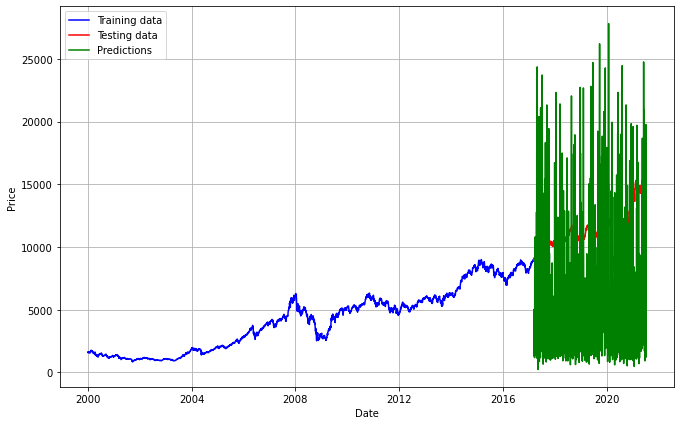

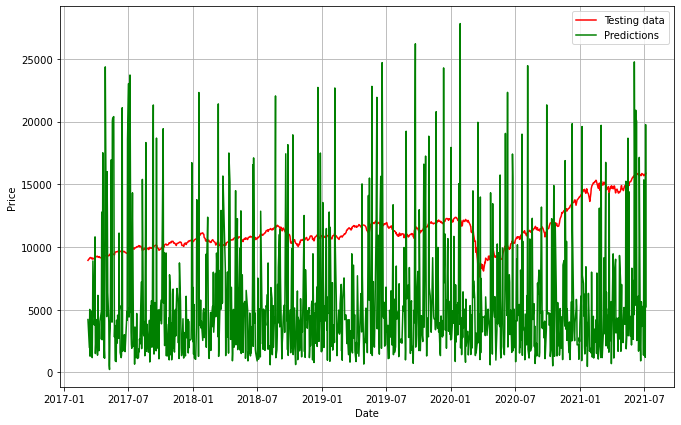

In [67]:
plot_predictions_multivar(model_4_preds)

# Predicting Future values

In [71]:
#1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
    """
    Makes future forecasts into_future steps after values ends.

    Returns future forecasts as list of floats.
    """
    # 2. Make an empty list for future forecasts/prepare data to forecast on
    future_forecast = []
    last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

    # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
    for _ in range(into_future):

        # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
        future_pred = model.predict(tf.expand_dims(last_window, axis=0))
        print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")

        # Append predictions to future_forecast
        future_forecast.append(tf.squeeze(future_pred).numpy())
        # print(future_forecast)

        # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
        last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]

    return future_forecast

In [73]:
y_all = list(df["Close"])

In [77]:
future_forecast = make_future_forecast(values=y_all,
                                       model=model_2,
                                       into_future=1,
                                       window_size=WINDOW_SIZE)

Predicting on: 
 [15748.45, 15721.5, 15680.0, 15722.2, 15834.35, 15818.25, 15879.65] -> Prediction: 15874.056640625

